In [1]:
from tensorflow.keras.models import load_model
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Replace 'your_directory_path' with the path to your folder
directory_path = 'F:/Coding stuff/grpPRJ/demo/test/test folder/'

model_path = 'F:/Coding stuff/grpPRJ/demo/'

In [3]:
# F:\Coding stuff\grpPRJ\USTHGroupProject\demo\dataset\HandGesture\images

# List all subdirectories using os.listdir()
labels = [f.name for f in os.scandir('F:/Coding stuff/grpPRJ/demo/dataset/HandGesture/images') if f.is_dir()]

# Print the list of subfolder names
print(labels)
print(len(labels))

['okay', 'paper', 'rock', 'scissor', 'thumbs', 'up']
6


In [4]:
model = tf.keras.models.load_model('F:/Coding stuff/grpPRJ/demo/best.h5')

In [5]:
import glob

# Define the path to the main folder
main_folder_path = directory_path

# Use glob to find all image files in subfolders
image_files = glob.glob(os.path.join(main_folder_path, '**', '*.jpg'), recursive=True)

print(type(image_files[0]))

# Print out all the image file paths
for image_file in image_files:
    print(image_file)


<class 'str'>
F:/Coding stuff/grpPRJ/demo/test/test folder\ok\okay.jpg
F:/Coding stuff/grpPRJ/demo/test/test folder\ok\okay2.jpg
F:/Coding stuff/grpPRJ/demo/test/test folder\ok\okay3.jpg
F:/Coding stuff/grpPRJ/demo/test/test folder\paper\paper1.jpg
F:/Coding stuff/grpPRJ/demo/test/test folder\paper\paper2.jpg
F:/Coding stuff/grpPRJ/demo/test/test folder\paper\paper3.jpg
F:/Coding stuff/grpPRJ/demo/test/test folder\rock\rock1.jpg
F:/Coding stuff/grpPRJ/demo/test/test folder\rock\rock2.jpg
F:/Coding stuff/grpPRJ/demo/test/test folder\rock\rock3.jpg
F:/Coding stuff/grpPRJ/demo/test/test folder\SCISSOR\scissor1.jpg
F:/Coding stuff/grpPRJ/demo/test/test folder\SCISSOR\scissor2.jpg
F:/Coding stuff/grpPRJ/demo/test/test folder\SCISSOR\scissor3.jpg
F:/Coding stuff/grpPRJ/demo/test/test folder\thumb\thumbs1.jpg
F:/Coding stuff/grpPRJ/demo/test/test folder\thumb\thumbs2.jpg
F:/Coding stuff/grpPRJ/demo/test/test folder\thumb\thumbs3.jpg
F:/Coding stuff/grpPRJ/demo/test/test folder\up\up1.jpg
F:/C

In [6]:
# Define the path string
path = 'F:/Coding stuff/grpPRJ/demo/test/test folder/LIKE LABEL/thump1.jpg'

# Extract the filename without the extension
filename = os.path.splitext(os.path.basename(path))[0]

# Print the filename
print(filename)


thump1


1/1 [==============================] - 0s 20ms/step
scissor1 --> paper - 96.56 %


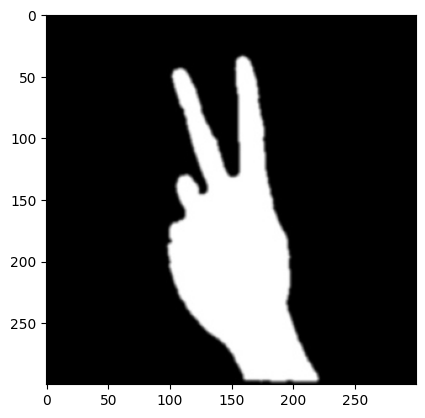

1/1 [==============================] - 0s 19ms/step
scissor2 --> up - 67.63 %


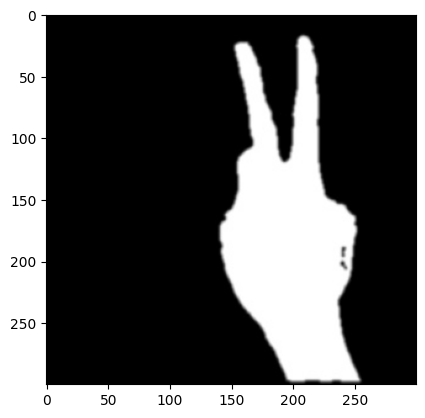

1/1 [==============================] - 0s 18ms/step
scissor3 --> paper - 49.53 %


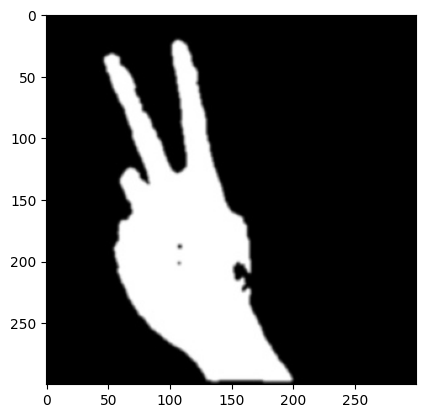

1/1 [==============================] - 0s 21ms/step
thumbs1 --> okay - 43.21 %


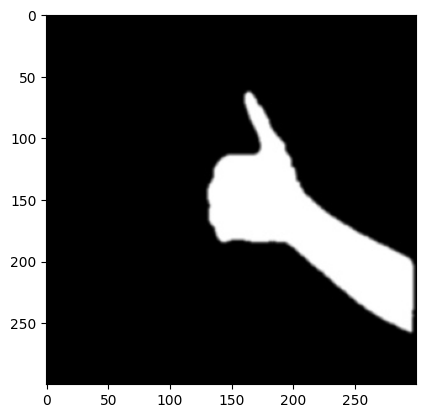

1/1 [==============================] - 0s 19ms/step
thumbs3 --> scissor - 70.06 %


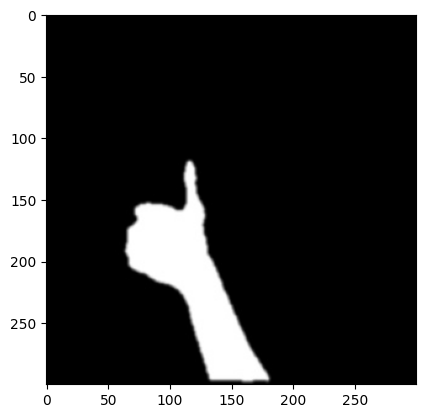

1/1 [==============================] - 0s 19ms/step
up1 --> rock - 78.65 %


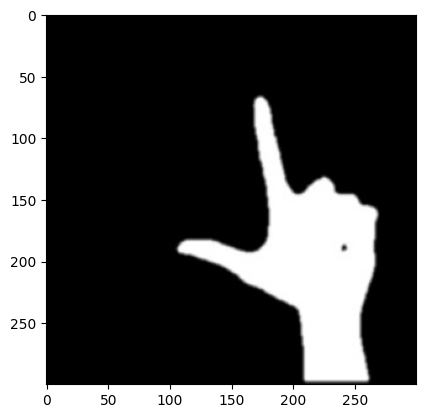

1/1 [==============================] - 0s 18ms/step
total acc 66.66666666666667 %
sai *6* ảnh trên tổng số *18* ảnh


In [7]:
acc = len(image_files)
acc1 = 0
for image_path in image_files:
    img = cv2.imread(image_path)
    resize = tf.image.resize(img, (200,240))
    grayscale_image = tf.image.rgb_to_grayscale(resize)
    yhat = model.predict(np.expand_dims(grayscale_image, 0))
    max_position = np.argmax(yhat)
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    # if labels[max_position] in image_name:
    # print(f'{image_name} --> {labels[max_position]} - {round(yhat[0][max_position]*100, 2)} %')
    if labels[max_position] not in image_name:
        acc1 += 1
        print(f'{image_name} --> {labels[max_position]} - {round(yhat[0][max_position]*100, 2)} %')

        img = cv2.imread(image_path)
        plt.imshow(img)
    plt.show()

print(f'total acc {(1-(acc1/acc))*100} %')
print(f'sai *{acc1}* ảnh trên tổng số *{acc}* ảnh')

In [8]:
max_position

5